<a href="https://colab.research.google.com/github/YeonJaeHong/ESAA_homeworks/blob/main/10_30_%EA%B3%BC%EC%A0%9C_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝
> ch5. 1~5
>> 290~319

05. 회귀



*  회귀: 여러개의 독립변수와 한개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
*   독립변수의 값에 영향을 미치는 회귀 계수


*   회귀계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러가지 유형으로 나눌 수 있음
*   회귀 계수가 선형이나 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있음 -> 단일 회귀, 다중 회귀



*   지도학습: 분류와 회귀로 나뉨 -> 분류는 예측값이 이산형 클래스값, 회귀는 연속형 숫자값
*   대표적인 선형회귀 모델


>*   일반 선형 회귀 : 실제-예측값의 RSS(Residual잔여의 Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
>*   릿지: 선형 회귀 + L2 규제 ⇒ L2 : 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제
>*  라쏘:선형 회귀 + L1 규제 ⇒ L1 : (L2는 회귀계수값 크기 줄이는데 반해) 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어, 회귀예측시 피처가 선택되지 않게 하는 것 → L1 규제는 피처 선택 기능으로 불림
>*  엘라스틱넷: L2, L1 규제를 함께 결합한 모델 → 주로 피처가 많은 데이터 세트에 적용됨
>*  로지스틱 회귀 : 분류에 사용되는 선형 회귀 모델













02. 단순 선형 회귀를 통한 회귀 이해


> 단순 선형 회귀는 독립변수도 하나, 종속 변수도 하나인 선형 회귀이다
> 잔차: 실제 값과 회귀 모델의 차이에 따른 오류값-> 최적의 회귀 모델을 만든다는 것은 젠처 데이터의 잔차 합이 최소가 되는 모델을 만든다는 것-> 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미
>> 오류합: 절댓값으로 합 (Mean Absolute Error), 오류값의 제곱을 구해서 더하는 방식(RSS)



03. 비용 최소화하기- 경사 하강법 소개
> 경사 하강법을 파이썬 코드로 구현하기

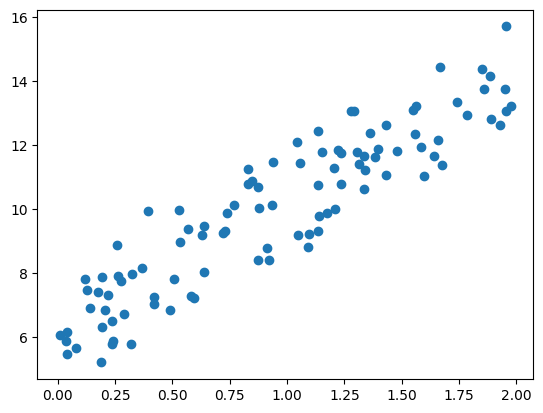

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4x+6을 근사(w1=4,w0=6).임의의 값은 노이즈를 위해 만듦
x= 2*np.random.rand(100,1)
y=6+ 4*x+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(x,y)

In [ ]:
def get_cost(y,pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

04. 사이킷런 linearregression을 이용한 보스턴 주택 가격 예측


LinearRegression 클래스- Ordinary Least Squares
> LinearRegression 클래스는 fit() method로 x,y배열을 입력받으면 회귀 계수(coefficients)인 W를 coef_속성에 저장
>fit_intercept: 절편값을 계산할 것인지 말지를 지정. default : True (절편계산)


normalize : default : false. True이면 입력 데이터 세트를 정규화 함.
속성
coef_: fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성.

> shape(Target 값 개수, 피처 개수)
intercept_ : intercept값. ### 선형 회귀의 다중 공선성 문제 (multi-collinearity)

In [ ]:
from sklearn.linear_model import LinearRegression
class sklearn.linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_x=True,n_jobs=1)

SyntaxError: ignored

회귀 평가 지표
> 실제 ㄱ밧과 회귀 예측값의 차이값을 기반으로 한 지표가 중심
실제값과 예측값의 차이를 더하면 오류가 상쇄되기에 오류의 절댓값 평균이나 제곱, 제곱후의 루트를 씌운 평균값을 구한다
>>

*   MAE : 실제와 예측값의 차이를 절댓값으로 변환해 평균
*   MSE: 실제값과 예측값의 차이를 제곱해서 평균


*   RMSE: MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지기에 MSE에 루트를 씌운거값
*   R^2 : 분산 기반으로 예측성능을 평가
> 사이킷런은 RMSE를 제공하기 않아서 계산하는 함수를 만들어야함


> 여기서 사용되는 cross_val_score, GridSearchCV와 같은 scoring 함수에 평가 지표를 적용할때 유의할점: neg_ 라는 접두사가 붙는데, 절댓값의 함에 음수의 표시를 붙이는 이유는 사이킷런의 scoring 함수는 score값이 클수록 좋은 평가 결과로 자동 평가하는데, 실제 값과 예측값의 오류차이를 기반으로 하는 회귀평가의 지표는 값이 커지면 오히려 나쁜 모델이라는 뜻이기에 이걸 사이킷런의 scoring 함수에 반영하려면 보정이 필요해서 neg_를 붙인다.







LinearRegression을 이용해 보스턴 주택 가격 회귀 구현


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


TypeError: ignored

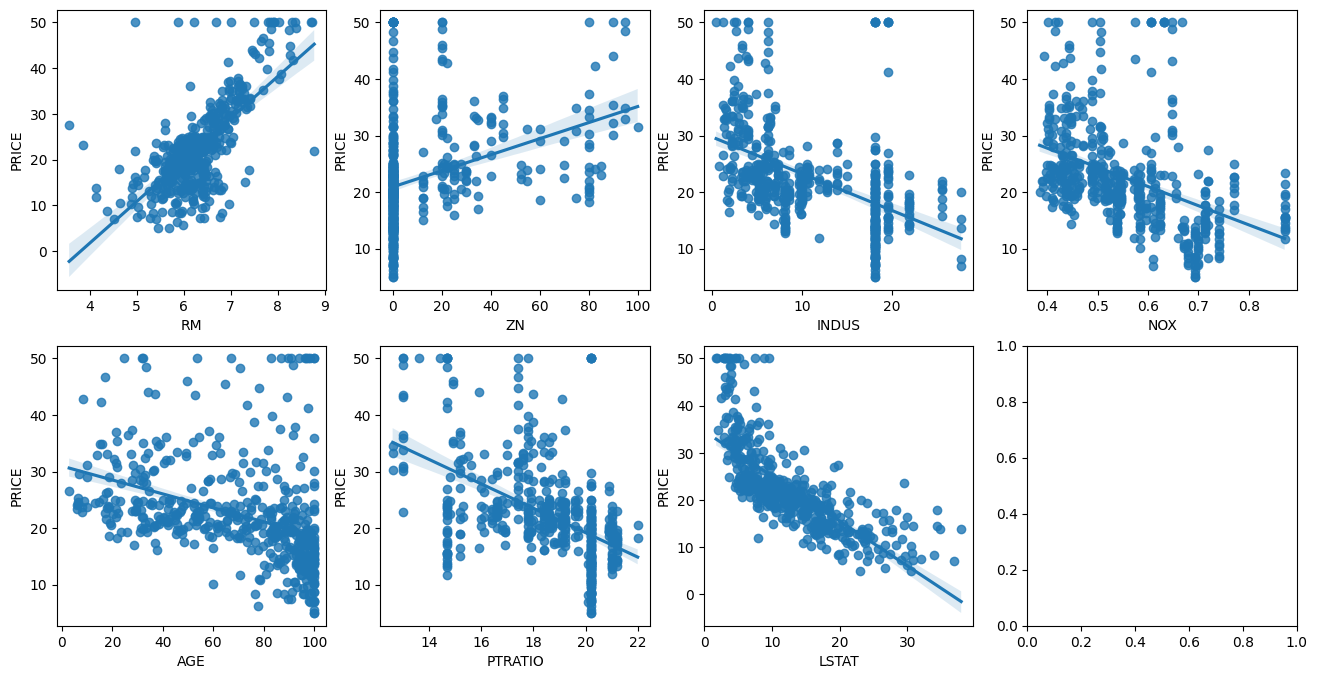

In [ ]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐
fig,axs= plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE',data=bostonDF, ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)

rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


TypeError: ignored

In [ ]:
#절편과 회귀 계수를 보기 위
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))


절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 series 로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_), index = X_data.columns)
coeff.sort_values(ascending=False)

CHAS        3.0
RM          3.0
CRIM       -0.0
ZN          0.0
INDUS       0.0
AGE         0.0
RAD         0.0
TAX        -0.0
B           0.0
PTRATIO    -1.0
LSTAT      -1.0
DIS        -2.0
NOX       -20.0
dtype: float64

In [ ]:

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [nan nan nan nan nan]
 5 folds 의 개별 RMSE scores :  [nan nan nan nan nan]
 5 folds 의 평균 RMSE : nan 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 354, in predict
    return self._decision_function(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 338, in _decision_function
    return safe_sparse_dot(X, self.coef

05. 다항 회귀와 과대 적합/ 과소 적합의 이해


In [ ]:

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [ ]:

# 3 차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)


3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


p.314 다항 회귀를 이용한 과소적합 및 과적합 이해

> 다항회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링 가능, 차수가 높아질 수록 매우 복잡한 피처간의 관계까지 모델링이 가능-> 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#임의의 값으로 구성된 x 값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

#X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더한값이다
y=true_fun(X) + np.random.randn(n_samples)*0.1

예측 결과를 다항식 차수를 각각 1,4,15로 변경하면서 cross_val_socre()로 mse 값을 구해서 성능을 평가

Degree1 회귀계수는 [-1.61]이다.
Degree 1 MSE는 0.4077289625098685이다.
Degree4 회귀계수는 [  0.47 -17.79  23.59  -7.26]이다.
Degree 4 MSE는 0.04320874987232064이다.
Degree15 회귀계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]이다.
Degree 15 MSE는 181238256.56423894이다.


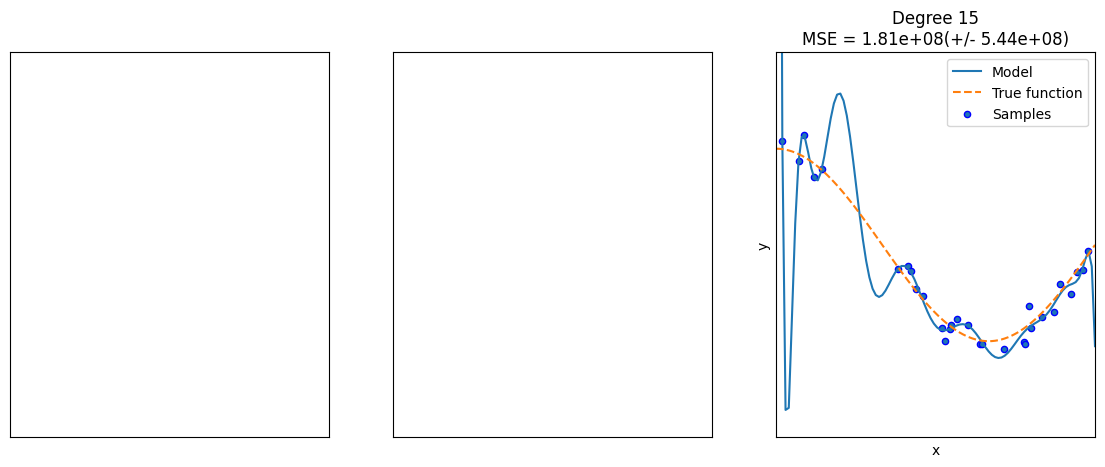

In [9]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

#다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax= plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(), yticks=())

  #개별 degree별로 polynomial 변환한다
  polynomial_features= PolynomialFeatures(degree=degrees[i],include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([("polynomial_features",polynomial_features),
                    ("linear_regression",linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  #교차검증으로 다항회귀 평가하기
  scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)

  #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients=pipeline.named_steps['linear_regression'].coef_
  print('Degree{0} 회귀계수는 {1}이다.'.format(degrees[i],np.round(coefficients,2)))
  print('Degree {0} MSE는 {1}이다.'.format(degrees[i],-1*np.mean(scores)))

# 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
# 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다. >
X_test = np.linspace(0, 1, 100)
# 예측값 곡선
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
# 실제 값 곡선
plt.plot(X_test, true_fun(X_test), '--', label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()